In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/antalya-muratpaa-daire-kira-cretleri-2024-ocak/antalya_kiralik_ev.csv


# ***Antalya House Rent Analysis and Prediction***


# *ABOUT THE DATASET*
1. mahalle: The neighborhood where the apartment is located.
2. fiyat: Monthly rental price of the apartment (in Turkish Lira).
3. brut_alan_m2: Total gross area of the apartment (in square meters).
4. net_alan_m2: Total net area of the apartment (in square meters).
5. oda_sayisi: Total number of rooms in the apartment.
6. bina_yas: Age of the building (in years).
7. dairenin_bulundugu_kat: Floor number where the apartment is located
8. bina_kat_sayisi: Total number of floors in the building
9. isitma_turu: Type of heating system in the apartment
10. banyo_sayisi: Number of bathrooms  in the apartment.
11. balkon: Indicates whether the apartment has a balcony (Yes/No).
12. asansor: Indicates whether the building has an elevator (Yes/No).
13. otopark: Indicates whether the building has a parking area (Yes/No).
14. esya_durumu: Indicates whether the apartment is furnished or not (Furnished/Unfurnished).
15. site_icinde: Within a residential complex or not
16. aidat: Monthly maintenance fee for the apartment (in Turkish Lira).
17. depozito: Deposit amount for the apartment (in Turkish Lira).
18. sahibi: Indicates whether the apartment owner is an individual or a real estate agent.


# **Import Libraries**

In [2]:
import numpy as np #mureic python demek. çok boyutlu dizi, matris ile işlemler yapmamızı sağlar.
import pandas as pd #veri temzileme, dönüştürme, keşif için. seriler ve dataframeler sağlar.
import plotly.express as px #yüksek seviyeli bir veri görselleştirme kütüphanesidir. hızlı bir şekilde çeşitli grafikler oluşturmayı sağlar.
import matplotlib.pyplot as plt #statik, animasyonlu ve etkileşimli görselleştirmeler sağlar. pyplot da arayüz sağlar.
import seaborn as sns #plt üzerine kurulur ve grafik oluşturmayı kolaylaştırır.


In [3]:
import warnings #import edilir. uyarılarla etkileşim kurmak için yüklenir.
warnings.filterwarnings('ignore') #kod çalışırken oluşabilecek uyarıları gizler

# **Load and read the dataset**

We read the dataset with the help of
"read.csv"

In [4]:
df=pd.read_csv("/kaggle/input/antalya-muratpaa-daire-kira-cretleri-2024-ocak/antalya_kiralik_ev.csv")


In [5]:
df.head()

,Unnamed: 0,mahalle,fiyat,brut_alan_m2,net_alan_m2,oda_sayisi,bina_yas,dairenin_bulundugu_kat,bina_kat_sayisi,isitma_turu,banyo_sayisi,balkon,asansor,otopark,esya_durumu,site_icinde,aidat,depozito,sahibi
0,1,Bayındır Mh.,15000.0,90.0,80.0,2+1,21-25 arası,Giriş Katı,4.0,Klima,1.0,0,0,Açık Otopark,1,0,100,15000,0
1,2,Çaybaşı Mh.,29000.0,145.0,135.0,3+1,0,1,5.0,Kombi (Doğalgaz),1.0,1,1,Kapalı Otopark,0,1,1500,30000,0
2,3,Güzeloba Mh.,24750.0,145.0,130.0,3+1,11-15 arası,3,4.0,Klima,1.0,1,0,Açık Otopark,0,0,500,25000,1
3,4,Şirinyalı Mh.,30000.0,230.0,200.0,3+1,5-10 arası,2,3.0,Doğalgaz Sobası,2.0,0,0,Açık Otopark,1,0,0,30000,0
4,5,Çağlayan Mh.,37500.0,320.0,300.0,4+2,16-20 arası,8,8.0,Klima,3.0,1,1,Açık Otopark,0,1,0,37500,0


# **Exploratory Data Analysis (EDA)**

Lets see if we have any null values

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              750 non-null    int64  
 1   mahalle                 750 non-null    object 
 2   fiyat                   750 non-null    float64
 3   brut_alan_m2            750 non-null    float64
 4   net_alan_m2             750 non-null    float64
 5   oda_sayisi              750 non-null    object 
 6   bina_yas                750 non-null    object 
 7   dairenin_bulundugu_kat  750 non-null    object 
 8   bina_kat_sayisi         750 non-null    float64
 9   isitma_turu             750 non-null    object 
 10  banyo_sayisi            750 non-null    float64
 11  balkon                  750 non-null    int64  
 12  asansor                 750 non-null    int64  
 13  otopark                 750 non-null    object 
 14  esya_durumu             750 non-null    in

As we can see, we have a dataset with 750 rows and 19 columns.
Using the info function, we were able to access basic information about the data. It shows the types of our variables and whether there are any missing values. As we can see, there are no missing values, but we will still examine the data in detail to confirm that.


Lets drop the "Unnamed: 0" column, cause we dont need any unnecessary datas.

In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)


**Do we have Absent Datas?
**

In [8]:
df.isnull().sum()

mahalle                   0
fiyat                     0
brut_alan_m2              0
net_alan_m2               0
oda_sayisi                0
bina_yas                  0
dairenin_bulundugu_kat    0
bina_kat_sayisi           0
isitma_turu               0
banyo_sayisi              0
balkon                    0
asansor                   0
otopark                   0
esya_durumu               0
site_icinde               0
aidat                     0
depozito                  0
sahibi                    0
dtype: int64

having 0 as output for each column indicates that there are no missing (null) values in those columns. It means that all rows in those columns are filled.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyat,750.0,24260.117333,16680.292541,10250.0,15000.0,20000.0,27000.0,200000.0
brut_alan_m2,750.0,123.754667,53.263920,25.0,85.0,115.0,150.0,400.0
net_alan_m2,750.0,111.505333,48.517233,20.0,75.0,100.0,140.0,370.0
bina_kat_sayisi,750.0,5.204000,2.959853,1.0,3.0,4.0,7.0,17.0
banyo_sayisi,750.0,1.280000,0.520860,1.0,1.0,1.0,1.0,4.0
balkon,750.0,0.917333,0.275561,0.0,1.0,1.0,1.0,1.0
asansor,750.0,0.626667,0.484012,0.0,0.0,1.0,1.0,1.0
esya_durumu,750.0,0.482667,0.500033,0.0,0.0,0.0,1.0,1.0
site_icinde,750.0,0.281333,0.449950,0.0,0.0,0.0,1.0,1.0
aidat,750.0,419.381333,2644.590077,0.0,0.0,50.0,300.0,70000.0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mahalle                 750 non-null    object 
 1   fiyat                   750 non-null    float64
 2   brut_alan_m2            750 non-null    float64
 3   net_alan_m2             750 non-null    float64
 4   oda_sayisi              750 non-null    object 
 5   bina_yas                750 non-null    object 
 6   dairenin_bulundugu_kat  750 non-null    object 
 7   bina_kat_sayisi         750 non-null    float64
 8   isitma_turu             750 non-null    object 
 9   banyo_sayisi            750 non-null    float64
 10  balkon                  750 non-null    int64  
 11  asansor                 750 non-null    int64  
 12  otopark                 750 non-null    object 
 13  esya_durumu             750 non-null    int64  
 14  site_icinde             750 non-null    in

As we can see here, we have different data types in our dataset. So we need to define them before we can use them to train our model.

In [11]:
df.describe(include='object').T 

,count,unique,top,freq
mahalle,750,50,Güzeloba Mh.,163
oda_sayisi,750,12,2+1,279
bina_yas,750,11,5-10 arası,159
dairenin_bulundugu_kat,750,22,2,139
isitma_turu,750,13,Klima,499
otopark,750,4,Açık Otopark,508


In [12]:
def colm(df):
    # Identify categorical columns (data type 'category', 'object', or 'bool')
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['category','object','bool']]
    
    # Identify numerical columns with fewer than 10 unique values (considered categorical)
    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ['int','float']]
    
    # Identify categorical columns with more than 15 unique values (considered cardinal)
    cat_but_car = [col for col in df.columns if df[col].nunique() > 15 and str(df[col].dtypes) in ['category','object']]
    
    # Add numerical but categorical columns to the categorical columns list
    cat_cols = cat_cols + num_but_cat
    
    # Remove cardinal columns from the categorical columns list
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # Identify numerical columns (data type 'int' or 'float')
    num_cols = [col for col in df.columns if df[col].dtypes in ['int', 'float']]
    
    # Remove columns that are already considered categorical from numerical columns
    num_cols = [col for col in num_cols if col not in cat_cols]

    # Print the lists of categorical, numerical, and cardinal columns
    print(f'Categorical : {cat_cols} \n Numerical : {num_cols} \n Cardinal : {cat_but_car}')
    
    # Return the lists of categorical, numerical, and cardinal columns
    return cat_cols, num_cols, cat_but_car


The colm function is used to create lists of categorical, numerical, and cardinal variables in a dataset. df is the dataframe provided as input to this function. The function examines this dataframe, categorizes the columns into three different categories, and processes them accordingly.


In [13]:
#Categorical Values: ['oda_sayisi', 'bina_yas', 'isitma_turu', 'otopark', 'banyo_sayisi', 'balkon', 'asansor', 'esya_durumu', 'site_icinde', 'sahibi'] 
 #Numerical Values : ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_kat_sayisi', 'aidat', 'depozito'] 
 #Cardinal Values : ['mahalle', 'dairenin_bulundugu_kat']

In [14]:
categorical, numerical, cardinal = colm(df)

Categorical : ['oda_sayisi', 'bina_yas', 'isitma_turu', 'otopark', 'banyo_sayisi', 'balkon', 'asansor', 'esya_durumu', 'site_icinde', 'sahibi'] 
 Numerical : ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_kat_sayisi', 'aidat', 'depozito'] 
 Cardinal : ['mahalle', 'dairenin_bulundugu_kat']


In [15]:
df['bina_yas'] = df['bina_yas'].replace({
    '0': 0,
    '1-5 arası': 3,
    '5-10 arası': 8,
    '11-15 arası': 13,
    '16-20 arası': 18,
    '21-25 arası': 23,
    '26-30 arası': 28,
    '31 ve üzeri': 35
}).astype(float)
df['bina_yas']


0      23.0
1       0.0
2      13.0
3       8.0
4      18.0
       ... 
745    18.0
746    13.0
747    13.0
748     8.0
749    18.0
Name: bina_yas, Length: 750, dtype: float64

Sometransformations enhance the dataset by adding new features that can help in further analysis, such as understanding pricing dynamics, space efficiency, and building characteristics. 

m2_basina_fiyat helps in understanding the cost efficiency of the space. By dividing the total price (fiyat) by the gross area (brut_alan_m2), you get the cost per square meter.

net_brut_orani indicates how much of the gross area (brut_alan_m2) is actually usable (net_alan_m2). A higher ratio means better space efficiency.

yas_kat_orani compares the age of the building (bina_yas) to the number of floors (bina_kat_sayisi). It can provide insights into the building's design and structural efficiency.






In [16]:
df['m2_basina_fiyat'] = df['fiyat'] / df['brut_alan_m2'] 
df['net_brut_orani'] = df['net_alan_m2'] / df['brut_alan_m2'] #Kullanılabilirlik
df['yas_kat_orani'] = df['bina_yas'] / df['bina_kat_sayisi'] # eğer korelasyon oranı çok düşük çıkarsa sonradan silinebilir


We have troubles with the 'mahalle' collumn. We need to compute the the average price, price per square meter, building age, and fee for each neighborhood, and then sorts the neighborhoods based on the average price in descending order. This will help us in comparing the overall price levels and other key features across different neighborhoods.

In [17]:
df.groupby('mahalle').agg({'fiyat':'mean','m2_basina_fiyat':'mean','bina_yas':'mean','aidat':'mean'}).sort_values(by='fiyat',ascending=False)


,fiyat,m2_basina_fiyat,bina_yas,aidat
mahalle,,,,
Yeşilbahçe Mh.,37326.086957,224.281652,19.043478,745.652174
Çağlayan Mh.,37024.615385,262.224514,13.030769,450.461538
Şirinyalı Mh.,34634.146341,210.318731,18.000000,493.292683
Fener Mah.,33488.095238,257.923824,15.309524,2296.428571
Gençlik Mh.,33382.352941,209.107261,26.941176,289.117647
Güzeloluk Mh.,32050.000000,240.757549,12.200000,510.000000
Bahçelievler Mh.,31808.333333,191.476255,17.416667,225.000000
Haşimişcan Mh.,29035.714286,294.372638,26.857143,42.857143
Meltem Mah.,27312.500000,201.855089,21.750000,275.000000


In [18]:
df[df['sahibi']==1].groupby('mahalle')['sahibi'].count().sort_values(ascending=False)


mahalle
Güzeloba Mh.        11
Kızılarık Mh.        5
Konuksever Mah.      4
Fener Mah.           4
Çaybaşı Mh.          3
Yenigün Mh.          3
Altındağ Mh.         3
Üçgen Mh.            3
Dutlubahçe Mh.       3
Çağlayan Mh.         2
Doğuyaka Mh.         2
Bayındır Mh.         2
Bahçelievler Mh.     2
Tahılpazarı Mh.      2
Meydankavağı Mh.     2
Muratpaşa Mh.        2
Soğuksu Mh.          1
Yüksekalan Mh.       1
Varlık Mh.           1
Kışla Mh.            1
Sedir Mah.           1
Memurevleri Mah.     1
Mehmetçik Mh.        1
Kızılsaray Mh.       1
Haşimişcan Mh.       1
Güzelbağ Mh.         1
Gençlik Mh.          1
Gebizli Mah.         1
Şirinyalı Mh.        1
Name: sahibi, dtype: int64

In [19]:
df.groupby(categorical).agg({'fiyat':'mean'}).sort_values(by='fiyat',ascending=False).reset_index()[0:15]


,oda_sayisi,bina_yas,isitma_turu,otopark,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,sahibi,fiyat
0,2+1,8.0,Klima,Açık Otopark,3.0,1,0,1,0,0,200000.0
1,3+1,8.0,Kombi (Doğalgaz),Kapalı Otopark,2.0,1,1,1,1,0,200000.0
2,4+1,18.0,Kombi (Doğalgaz),Açık Otopark,2.0,1,0,1,1,0,120000.0
3,4+1,13.0,Kombi (Doğalgaz),Açık & Kapalı Otopark,3.0,1,1,0,1,1,107000.0
4,5+1,18.0,Kombi (Doğalgaz),Açık & Kapalı Otopark,3.0,1,1,0,0,0,100000.0
5,4+1,13.0,Yerden Isıtma,Kapalı Otopark,2.0,1,1,0,0,0,90000.0
6,3+1,13.0,Kombi (Doğalgaz),Kapalı Otopark,2.0,1,1,1,1,0,87500.0
7,2+1,23.0,Klima,Açık Otopark,1.0,1,1,1,0,0,85250.0
8,3+1,13.0,Merkezi,Kapalı Otopark,2.0,1,1,1,1,0,85000.0
9,3+1,23.0,Kombi (Doğalgaz),Açık & Kapalı Otopark,1.0,1,1,1,1,0,80000.0


We create data groups by a specified categorical column, calculates the average price for each category, sorts the results by average price in descending order, and then displays the top 15 categories with the highest average prices. This is useful for understanding which categories have the highest average property prices.


In [20]:
fig = px.histogram(df, x='fiyat', color_discrete_sequence=['#FF6347'])
fig.show()


Now we have to define the upper limit for outliers by calculating the 99th percentile of the 'fiyat' column.

In 'fiyat' dataset, some houses may have prices significantly higher than others. These excessively high prices can skew the analysis results or impair the model's performance. Therefore, by determining the upper limit below the 99th percentile of prices, we can identify these extreme values and decide how to address them.


In [21]:
outliers = df[['fiyat']].quantile(q=.99)
outliers


fiyat    88775.0
Name: 0.99, dtype: float64

Let's filter the dataframe to include only rows where the 'fiyat' value is below the defined upper limit for outliers

In [22]:
df_non_outliers=df[df['fiyat']<outliers[0]]


In [23]:
px.histogram(df_non_outliers,x='fiyat', color_discrete_sequence=['#FF6347']) #fiyat'a bakalım
fig.show()


In [24]:
categorical_no,numerical_no,cardinal_no = colm(df_non_outliers)

Categorical : ['oda_sayisi', 'isitma_turu', 'otopark', 'banyo_sayisi', 'balkon', 'asansor', 'esya_durumu', 'site_icinde', 'sahibi'] 
 Numerical : ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_yas', 'bina_kat_sayisi', 'aidat', 'depozito', 'm2_basina_fiyat', 'net_brut_orani', 'yas_kat_orani'] 
 Cardinal : ['mahalle', 'dairenin_bulundugu_kat']


In [25]:
df_non_outliers.groupby(categorical_no).agg({'fiyat':'mean'}).sort_values(by='fiyat',ascending=False).reset_index()[0:15]

,oda_sayisi,isitma_turu,otopark,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,sahibi,fiyat
0,3+1,Kombi (Doğalgaz),Kapalı Otopark,2.0,1,1,1,1,0,87500.0
1,3+1,Merkezi,Kapalı Otopark,2.0,1,1,1,1,0,85000.0
2,3+1,Kombi (Doğalgaz),Açık & Kapalı Otopark,1.0,1,1,1,1,0,80000.0
3,4+1,Kombi (Doğalgaz),Açık & Kapalı Otopark,2.0,1,1,0,1,0,75000.0
4,4+1,Merkezi,Açık Otopark,3.0,1,1,1,1,0,72000.0
5,4+2,Kombi (Doğalgaz),Açık Otopark,3.0,1,1,0,0,0,70000.0
6,3+1,Kombi (Doğalgaz),Açık & Kapalı Otopark,2.0,1,1,0,1,0,70000.0
7,4+1,Klima,Açık & Kapalı Otopark,3.0,1,1,0,0,0,65000.0
8,3+1,Kombi (Doğalgaz),Açık & Kapalı Otopark,3.0,1,1,1,1,0,60000.0
9,2+1,Kombi (Doğalgaz),Açık Otopark,2.0,1,1,1,1,0,60000.0


In [26]:
df_non_outliers.groupby('mahalle').agg({'fiyat':'mean','m2_basina_fiyat':'mean','bina_yas':'mean','aidat':'mean'}).sort_values(by='fiyat',ascending=False)

,fiyat,m2_basina_fiyat,bina_yas,aidat
mahalle,,,,
Yeşilbahçe Mh.,34704.545455,212.331751,19.318182,779.545455
Şirinyalı Mh.,34634.146341,210.318731,18.000000,493.292683
Güzeloluk Mh.,32050.000000,240.757549,12.200000,510.000000
Bahçelievler Mh.,31808.333333,191.476255,17.416667,225.000000
Fener Mah.,31695.121951,252.867883,15.365854,2291.463415
Çağlayan Mh.,30751.612903,236.471937,13.112903,440.000000
Gençlik Mh.,29843.750000,199.676465,27.812500,307.187500
Haşimişcan Mh.,29035.714286,294.372638,26.857143,42.857143
Meltem Mah.,27312.500000,201.855089,21.750000,275.000000


In [27]:
df['mahalle'].value_counts(normalize=True)


mahalle
Güzeloba Mh.        0.217333
Çağlayan Mh.        0.086667
Fener Mah.          0.056000
Şirinyalı Mh.       0.054667
Kızılarık Mh.       0.046667
Meydankavağı Mh.    0.033333
Yeşilbahçe Mh.      0.030667
Bayındır Mh.        0.029333
Gençlik Mh.         0.022667
Gebizli Mah.        0.022667
Yüksekalan Mh.      0.022667
Konuksever Mah.     0.022667
Yenigün Mh.         0.020000
Muratpaşa Mh.       0.018667
Kızıltoprak Mh.     0.017333
Kışla Mh.           0.017333
Varlık Mh.          0.017333
Bahçelievler Mh.    0.016000
Soğuksu Mh.         0.016000
Deniz Mah.          0.016000
Üçgen Mh.           0.016000
Altındağ Mh.        0.014667
Sinan Mah.          0.014667
Etiler Mah.         0.013333
Sedir Mah.          0.012000
Çaybaşı Mh.         0.010667
Güvenlik Mh.        0.010667
Meltem Mah.         0.010667
Haşimişcan Mh.      0.009333
Zerdalilik Mah.     0.009333
Dutlubahçe Mh.      0.008000
Kızılsaray Mh.      0.008000
Güzelbağ Mh.        0.008000
Yeşildere Mh.       0.006667
Güzelo

<Axes: ylabel='Frequency'>

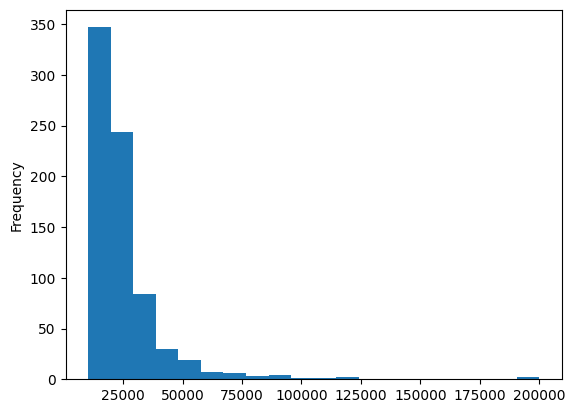

In [28]:
df['fiyat'].plot.hist(bins=20)

In [29]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mahalle,750,50,Güzeloba Mh.,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiyat,750.0,NaN,NaN,NaN,24260.117333,16680.292541,10250.0,15000.0,20000.0,27000.0,200000.0
brut_alan_m2,750.0,NaN,NaN,NaN,123.754667,53.26392,25.0,85.0,115.0,150.0,400.0
net_alan_m2,750.0,NaN,NaN,NaN,111.505333,48.517233,20.0,75.0,100.0,140.0,370.0
oda_sayisi,750,12,2+1,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_yas,750.0,NaN,NaN,NaN,14.493333,8.734893,0.0,8.0,13.0,23.0,35.0
dairenin_bulundugu_kat,750,22,2,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bina_kat_sayisi,750.0,NaN,NaN,NaN,5.204,2.959853,1.0,3.0,4.0,7.0,17.0
isitma_turu,750,13,Klima,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
banyo_sayisi,750.0,NaN,NaN,NaN,1.28,0.52086,1.0,1.0,1.0,1.0,4.0


In [30]:
numeric_columns=df.select_dtypes(include=['number'])
numeric_columns

,fiyat,brut_alan_m2,net_alan_m2,bina_yas,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,m2_basina_fiyat,net_brut_orani,yas_kat_orani
0,15000.0,90.0,80.0,23.0,4.0,1.0,0,0,1,0,100,15000,0,166.666667,0.888889,5.750000
1,29000.0,145.0,135.0,0.0,5.0,1.0,1,1,0,1,1500,30000,0,200.000000,0.931034,0.000000
2,24750.0,145.0,130.0,13.0,4.0,1.0,1,0,0,0,500,25000,1,170.689655,0.896552,3.250000
3,30000.0,230.0,200.0,8.0,3.0,2.0,0,0,1,0,0,30000,0,130.434783,0.869565,2.666667
4,37500.0,320.0,300.0,18.0,8.0,3.0,1,1,0,1,0,37500,0,117.187500,0.937500,2.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,16000.0,120.0,110.0,18.0,3.0,1.0,1,1,0,0,250,16000,0,133.333333,0.916667,6.000000
746,25000.0,170.0,160.0,13.0,17.0,1.0,1,1,1,0,0,25000,0,147.058824,0.941176,0.764706
747,30000.0,220.0,200.0,13.0,13.0,2.0,1,1,0,0,0,30000,0,136.363636,0.909091,1.000000
748,20000.0,70.0,65.0,8.0,5.0,1.0,1,1,1,0,500,20000,1,285.714286,0.928571,1.600000


In [31]:
numeric_columns.corr()

,fiyat,brut_alan_m2,net_alan_m2,bina_yas,bina_kat_sayisi,banyo_sayisi,balkon,asansor,esya_durumu,site_icinde,aidat,depozito,sahibi,m2_basina_fiyat,net_brut_orani,yas_kat_orani
fiyat,1.000000,0.511984,0.495797,-0.033311,0.269928,0.492152,0.120014,0.174835,0.140044,0.267209,0.172726,0.430478,-0.002673,0.625610,0.012797,-0.138555
brut_alan_m2,0.511984,1.000000,0.991472,0.259730,0.342037,0.587141,0.291155,0.175888,-0.182277,0.083828,0.084112,0.292744,-0.021027,-0.256644,0.147914,0.004748
net_alan_m2,0.495797,0.991472,1.000000,0.264372,0.352500,0.573121,0.298123,0.182702,-0.191181,0.086562,0.082290,0.283400,-0.023040,-0.266875,0.262837,-0.001757
bina_yas,-0.033311,0.259730,0.264372,1.000000,0.212941,-0.094668,0.078535,-0.175539,-0.194590,-0.111114,0.011925,-0.028625,-0.036427,-0.309841,0.092332,0.625898
bina_kat_sayisi,0.269928,0.342037,0.352500,0.212941,1.000000,0.172476,0.050169,0.501500,-0.052184,0.283663,0.156122,0.197343,0.000853,-0.005219,0.121714,-0.395540
banyo_sayisi,0.492152,0.587141,0.573121,-0.094668,0.172476,1.000000,0.114973,0.155700,0.023786,0.159055,0.035276,0.331862,-0.031466,0.104620,0.024100,-0.146647
balkon,0.120014,0.291155,0.298123,0.078535,0.050169,0.114973,1.000000,0.008542,-0.136376,0.069375,0.018278,0.071981,-0.060571,-0.155017,0.137510,0.030040
asansor,0.174835,0.175888,0.182702,-0.175539,0.501500,0.155700,0.008542,1.000000,-0.021257,0.213179,0.069260,0.186441,0.045149,0.065347,0.069109,-0.485050
esya_durumu,0.140044,-0.182277,-0.191181,-0.194590,-0.052184,0.023786,-0.136376,-0.021257,1.000000,0.084011,-0.034797,0.072216,0.039031,0.379666,-0.102443,-0.100155
site_icinde,0.267209,0.083828,0.086562,-0.111114,0.283663,0.159055,0.069375,0.213179,0.084011,1.000000,0.161098,0.213928,-0.037347,0.235941,0.030794,-0.157101


In [32]:
df['fiyat'].median() 

20000.0

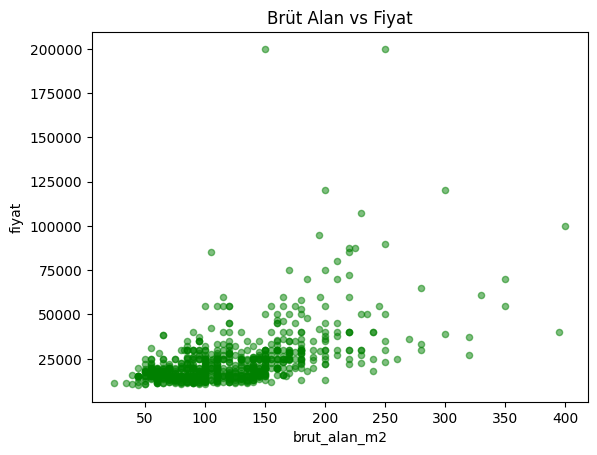

In [33]:
df.plot.scatter(x='brut_alan_m2', y='fiyat', alpha=0.5, color='green')
plt.title('Brüt Alan vs Fiyat')
plt.show()


In [34]:
missing_percentage = df.isnull().mean() * 100
missing_percentage


mahalle                   0.0
fiyat                     0.0
brut_alan_m2              0.0
net_alan_m2               0.0
oda_sayisi                0.0
bina_yas                  0.0
dairenin_bulundugu_kat    0.0
bina_kat_sayisi           0.0
isitma_turu               0.0
banyo_sayisi              0.0
balkon                    0.0
asansor                   0.0
otopark                   0.0
esya_durumu               0.0
site_icinde               0.0
aidat                     0.0
depozito                  0.0
sahibi                    0.0
m2_basina_fiyat           0.0
net_brut_orani            0.0
yas_kat_orani             0.0
dtype: float64

In [35]:
pivot_table = df.pivot_table(values='fiyat', index='mahalle', columns='isitma_turu', aggfunc='mean')
pivot_table


isitma_turu,Doğalgaz Sobası,Fancoil Ünitesi,Güneş Enerjisi,Kat Kaloriferi,Klima,Kombi (Doğalgaz),Kombi (Elektrik),Merkezi,Merkezi (Pay Ölçer),Soba,Yerden Isıtma,Yok,Şömine
mahalle,,,,,,,,,,,,,
Altındağ Mh.,NaN,NaN,NaN,NaN,15861.111111,20000.000000,NaN,NaN,NaN,NaN,NaN,12000.000000,NaN
Bahçelievler Mh.,NaN,NaN,NaN,36000.0,30028.571429,45500.000000,NaN,25000.0,NaN,NaN,NaN,19500.000000,NaN
Balbey Mah.,NaN,NaN,NaN,NaN,14500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bayındır Mh.,NaN,NaN,NaN,NaN,19285.714286,23500.000000,NaN,NaN,NaN,NaN,NaN,14666.666667,NaN
Cumhuriyet Mah.,NaN,NaN,NaN,NaN,12500.000000,NaN,NaN,NaN,NaN,NaN,NaN,14500.000000,NaN
Demircikara Mah.,NaN,NaN,NaN,NaN,16750.000000,28000.000000,NaN,NaN,NaN,NaN,NaN,12000.000000,NaN
Deniz Mah.,NaN,NaN,NaN,NaN,19178.571429,34000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doğuyaka Mh.,NaN,NaN,NaN,NaN,17250.000000,20500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dutlubahçe Mh.,NaN,NaN,NaN,NaN,15625.000000,18000.000000,NaN,NaN,NaN,NaN,NaN,12000.000000,NaN


In [36]:
vc=df_non_outliers['mahalle'].value_counts()
other = vc[vc<=10]
df_non_outliers['mahalle'] = df_non_outliers['mahalle'].apply(lambda x: 'other' if x in other else x)

In [37]:
df_non_outliers['dairenin_bulundugu_kat'] = df_non_outliers['dairenin_bulundugu_kat'].apply(lambda x:0 if (x=='Giriş Katı' or x=='Bahçe Katı' or x=='Yüksek Giriş' or x=='Zemin Kat') else(-1 if (x=='Bodrum Kat' or x=='Giriş Altı Kot 2') else(-5 if (x=='Çatı Katı' or x=='Villa Tipi') else x))).astype('int')

In [38]:
df_non_outliers['dairenin_bulundugu_kat'].value_counts(), df_non_outliers['mahalle'].value_counts()

(dairenin_bulundugu_kat
  0     152
  1     137
  2     137
  3     100
  4      76
  6      36
  5      33
  9      12
  7      12
  8      11
 -5       9
  11      6
  12      5
  10      5
 -1       4
  15      4
  13      3
 Name: count, dtype: int64,
 mahalle
 Güzeloba Mh.        161
 other               128
 Çağlayan Mh.         62
 Şirinyalı Mh.        41
 Fener Mah.           41
 Kızılarık Mh.        35
 Meydankavağı Mh.     25
 Bayındır Mh.         22
 Yeşilbahçe Mh.       22
 Yüksekalan Mh.       17
 Konuksever Mah.      17
 Gebizli Mah.         17
 Gençlik Mh.          16
 Yenigün Mh.          15
 Muratpaşa Mh.        14
 Kışla Mh.            13
 Kızıltoprak Mh.      13
 Varlık Mh.           13
 Bahçelievler Mh.     12
 Üçgen Mh.            12
 Deniz Mah.           12
 Soğuksu Mh.          12
 Altındağ Mh.         11
 Sinan Mah.           11
 Name: count, dtype: int64)

In [39]:
dummie_df = pd.get_dummies(df_non_outliers[categorical_no],drop_first=True)

In [40]:
df_non_outliers.drop(categorical_no,axis=1,inplace=True)
df_non_outliers = pd.concat([df_non_outliers,dummie_df],axis=1)


In [41]:
from sklearn.preprocessing import LabelEncoder
ss = LabelEncoder()
df_non_outliers['mahalle'] = ss.fit_transform(df_non_outliers['mahalle'])
df_non_outliers['dairenin_bulundugu_kat'] = ss.fit_transform(df_non_outliers['dairenin_bulundugu_kat'])

In [42]:
df_non_outliers.corr()['fiyat'].sort_values(ascending=False,key=abs)[1:]


brut_alan_m2                       0.539966
net_alan_m2                        0.527839
banyo_sayisi                       0.501710
depozito                           0.499828
m2_basina_fiyat                    0.493237
dairenin_bulundugu_kat             0.400515
bina_kat_sayisi                    0.369649
isitma_turu_Kombi (Doğalgaz)       0.365577
site_icinde                        0.306488
isitma_turu_Klima                 -0.298436
oda_sayisi_4+1                     0.276200
asansor                            0.259836
aidat                              0.235855
otopark_Kapalı Otopark             0.223273
oda_sayisi_3+1                     0.203340
yas_kat_orani                     -0.181738
isitma_turu_Merkezi                0.175740
otopark_Yok                       -0.172502
esya_durumu                        0.150321
isitma_turu_Yerden Isıtma          0.147808
isitma_turu_Yok                   -0.140466
balkon                             0.140200
oda_sayisi_2+1                  

In [43]:
from sklearn.model_selection import train_test_split

X = df_non_outliers.drop('fiyat',axis=1)
y = df_non_outliers['fiyat']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=43)

In [44]:
#modelleme ve en uygun modeli bulalım
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

def compare_models(X_train,X_test,y_train, y_test):
    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        SVR(),
        XGBRegressor(),
        LGBMRegressor(verbose=-1),
        CatBoostRegressor(verbose=False)
    ]
    
    results = []
    for model in models:
        model_name = model.__class__.__name__

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        r2 = r2_score(y_test, y_pred)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_cv = np.sqrt(-scores.mean())
        print(f"{model_name} = RMSE: {rmse}, RMSEcv : {rmse_cv}, r2 Score: {r2}")

In [45]:
compare_models(X_train,X_test,y_train, y_test)


LinearRegression = RMSE: 3378.361749145278, RMSEcv : 4696.474540301507, r2 Score: 0.896470268652034
Ridge = RMSE: 3269.60134409069, RMSEcv : 4600.188126497544, r2 Score: 0.9030288845997794
Lasso = RMSE: 3326.3661640207465, RMSEcv : 4669.467540473477, r2 Score: 0.899632549317424
DecisionTreeRegressor = RMSE: 4359.333907157601, RMSEcv : 5093.618674316406, r2 Score: 0.8276175473505819
RandomForestRegressor = RMSE: 3065.173752420054, RMSEcv : 3764.1756570513717, r2 Score: 0.9147757907119832
SVR = RMSE: 11055.252034934027, RMSEcv : 12609.12480264714, r2 Score: -0.1086388169040926
XGBRegressor = RMSE: 2550.6389999927014, RMSEcv : 3435.6969375214735, r2 Score: 0.940986581037318
LGBMRegressor = RMSE: 2722.16495115958, RMSEcv : 3589.9110954399175, r2 Score: 0.9327826076108943
CatBoostRegressor = RMSE: 1886.4630208386616, RMSEcv : 2950.893791388626, r2 Score: 0.967718821786263


In [46]:
model = CatBoostRegressor(verbose=False)
model.fit(X_train, y_train,verbose=False)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2Score = r2_score(y_test, y_pred)
print(f" RMSE: {rmse} \n  r2: {r2Score}")

 RMSE: 1886.4630208386616 
  r2: 0.967718821786263
